- 给定model和结构，输出费米能级
  - 通过实例化ElecStruCal类，指定kmesh，以计算Au primitive cell的费米能级

In [1]:
from dptb.postprocess.elec_struc_cal import ElecStruCal

# from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model
import numpy as np
from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="nnsk.best.pth")
AtomicData_options={
        "r_max": 5.50,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }


results_path = "./band_plot"        
stru_data = "PRIMCELL.vasp"

log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

AtomicData_options = AtomicData_options
nel_atom = {"Au":11}

elec_cal = ElecStruCal(model=model,
            device='cpu')
_, efermi =elec_cal.get_fermi_level(data=stru_data, 
                nel_atom = nel_atom,
               kmesh=[30,30,30],
               AtomicData_options=AtomicData_options)



TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
DEEPTB INFO    KPOINTS  kmesh sampling: 14806 kpoints
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/torch/nested/__init__.py:58: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(tensor_list, dtype, None, device, None)
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -3.257252335548401 based on the valence electrons setting nel_atom : {'Au': 11} .


- 此外，我们可以得到指定k点的eigenvalues

In [2]:
from dptb.data import AtomicData, AtomicDataDict
import numpy as np
klist = np.array([[0., 0., 0.], [0.5, 0.5, 0.5]])   
_,eigs = elec_cal.get_eigs(
    data=stru_data,
    klist=klist,
    AtomicData_options=AtomicData_options
)

eigs


array([[-13.100538  ,  -7.959001  ,  -7.9589977 ,  -7.9589934 ,
         -6.388376  ,  -6.38837   ,  20.395931  ,  20.395937  ,
         20.39594   ],
       [-10.609742  ,  -8.012503  ,  -8.0125    ,  -5.1855097 ,
         -5.1855087 ,  -4.113936  ,   0.02307558,   5.4708214 ,
          5.4708247 ]], dtype=float32)

- 同时可以指定klist以计算费米能级
  - 以Si bulk为例

In [3]:
from dptb.data import AtomicData, AtomicDataDict
import numpy as np
from dptb.postprocess.elec_struc_cal import ElecStruCal
# from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model
from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="../silicon/ref_ckpts/dptb/checkpoint/mix.ep50.pth")
AtomicData_options={
        "r_max": 5.50,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }


results_path = "./band_plot"        
stru_data = "../silicon/data/silicon.vasp"

log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

AtomicData_options = AtomicData_options
# nel_atom = {"Au":11}
nel_atom = {'Si':4}



klist =  np.load('../silicon/data/kpath.0/kpoints.npy')
elec_cal = ElecStruCal(model=model,
            device='cpu')
data, efermi = elec_cal.get_fermi_level(data=stru_data, 
                nel_atom = nel_atom,
               klist=klist,
               AtomicData_options=AtomicData_options)





DEEPTB INFO    The ['hopping_param', 'strain_param'] are frozen!
DEEPTB INFO    KPOINTS  klist: 302 kpoints
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -9.011844158172607 based on the valence electrons setting nel_atom : {'Si': 4} .


- 计算费米能级的方法已经内置在get_bands中
  - get_bands会利用klist作为k点调用get_fermi_level以获得费米能级

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
/opt/mamba/envs/deeptb-dev/lib/python3.10/site-packages/torch/nested/__init__.py:58: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(tensor_list, dtype, None, device, None)
DEEPTB INFO    KPOINTS  klist: 302 kpoints
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -9.011844158172607 based on the valence electrons setting nel_atom : {'Si': 4} .
DEEPTB INFO    The fermi energy is not provided, use the estimated value in line-mode: -9.011844158172607


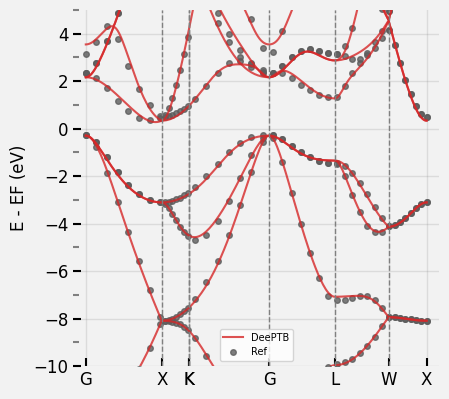

In [1]:
# band plot
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model

from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="../silicon/ref_ckpts/dptb/checkpoint/mix.ep50.pth")
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0.0000000000,  0.0000000000,   0.0000000000,   50],   
                [0.5000000000,   0.0000000000,   0.5000000000,   50],               
                [0.6250000000,   0.2500000000,   0.6250000000,   1],    
                [0.3750000000,   0.3750000000,   0.7500000000,   50],     
                [0.0000000000,   0.0000000000,   0.0000000000,   50],    
                [0.5000000000,   0.5000000000,   0.5000000000,   50],                
                [0.5000000000,   0.2500000000,   0.7500000000,   50],               
                [0.5000000000,   0.0000000000,   0.5000000000,   1 ]
                ],
        "klabels":["G","X","X/U","K","G","L","W","X"],
        "nel_atom": {"Si":4},
        "emin":-10,
        "emax":5,
        "ref_band": "../silicon/data/kpath.0/eigenvalues.npy"
    }
AtomicData_options={
        "r_max": 5.50,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "../silicon/data/silicon.vasp"
AtomicData_options = AtomicData_options


log_path = results_path+'/log'
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])

- 运用klist得到的费米能级有些情况下是不准确的，如在Au primitive cell体系中用klist计算费米能级（如下所示）

DEEPTB INFO    KPOINTS  klist: 1201 kpoints
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -0.3654080182313919 based on the valence electrons setting nel_atom : {'Au': 11} .
DEEPTB INFO    The fermi energy is not provided, use the estimated value in line-mode: -0.3654080182313919


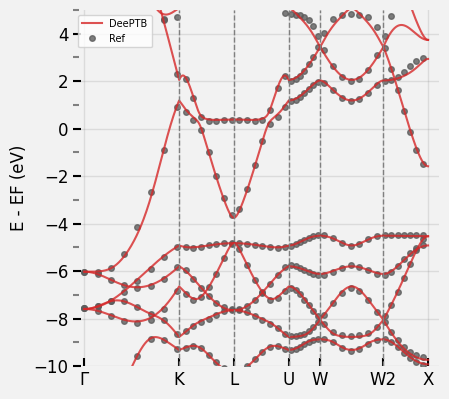

In [3]:
# band plot
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.build import build_model

from dptb.utils.loggers import set_log_handles
import logging
from pathlib import Path


model = build_model(checkpoint="nnsk.best.pth")
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0., 0.,0,200], 
                [0.3750000000,	0.3750000000,	0.7500000000,200],
                [0.5000000000,	0.5000000000,	0.5000000000,200], 
                [0.6250000000,	0.2500000000,	0.6250000000,200],
                [0.5000000000,	0.2500000000,	0.7500000000,200],
                [0.7500000000,	0.2500000000,	0.5000000000,200],
                [0.5000000000,	0.0000000000,	0.5000000000,1]],
        "klabels":[r'$\Gamma$', 'K', 'L', 'U','W', 'W2', 'X'],
        "nel_atom": {"Au":11},
        "emin":-10,
        "emax":5,
        "ref_band": "./Au_eigenvalues.npy"
    }
AtomicData_options={
        "r_max": 5.5,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "PRIMCELL.vasp"
AtomicData_options = AtomicData_options
bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])

- 以下为SIESTA在Au Primitive Cell上计算得到的能带和费米能级（Extracted by sisl package）
![jupyter](./siesta_band_plot.png)

- 而采用kmesh计算得到的fermi_level作为输入，可以得到与SIESTA计算输出相同的结果

DEEPTB INFO    KPOINTS  klist: 1201 kpoints
DEEPTB INFO    Getting eigenvalues from the model.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -0.3654080182313919 based on the valence electrons setting nel_atom : {'Au': 11} .
DEEPTB INFO    use input fermi energy: -3.257252335, While the estimated value in line-mode is -0.3654080182313919


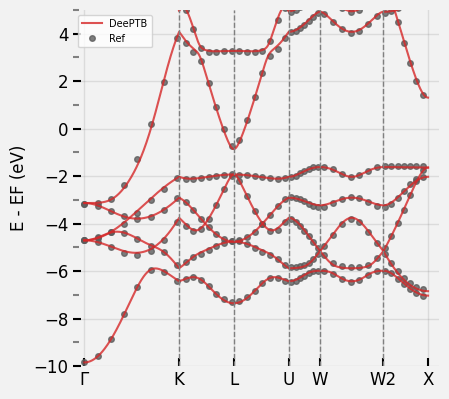

In [5]:
# band plot
task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0., 0.,0,200], 
                [0.3750000000,	0.3750000000,	0.7500000000,200],
                [0.5000000000,	0.5000000000,	0.5000000000,200], 
                [0.6250000000,	0.2500000000,	0.6250000000,200],
                [0.5000000000,	0.2500000000,	0.7500000000,200],
                [0.7500000000,	0.2500000000,	0.5000000000,200],
                [0.5000000000,	0.0000000000,	0.5000000000,1]],
        "klabels":[r'$\Gamma$', 'K', 'L', 'U','W', 'W2', 'X'],
        "nel_atom":{"Au":11},
        "E_fermi":-3.257252335,
        "emin":-10,
        "emax":5,
        "ref_band": "./Au_eigenvalues.npy"
    }
AtomicData_options={
        "r_max": 5.5,
        "er_max": 5.0,
        "oer_max": 2.5,
        "pbc": True
    }

results_path = "./band_plot"        
kpath_kwargs = task_options
stru_data = "PRIMCELL.vasp"
AtomicData_options = AtomicData_options
bcal = Band(model=model,
            use_gui=True, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = kpath_kwargs["E_fermi"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])